<a href="https://colab.research.google.com/github/Tahsin-Azad-Tias/Thesis/blob/main/model/ML_Models_RFECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.1 MB/s eta 0:00:00


In [ ]:
!gdown --id "1M9TX_sIGURVyGory7oHh5oO_gfjoWnx3"
!gdown --id "1-pUUsukgZizH-dJobClAlXeHwSyiR2cB"

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1M9TX_sIGURVyGory7oHh5oO_gfjoWnx3
To: /content/train_data_rfecv.csv
100% 48.1M/48.1M [00:00<00:00, 100MB/s] 
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-pUUsukgZizH-dJobClAlXeHwSyiR2cB
To: /content/test_data_rfecv.csv
100% 17.3M/17.3M [00:00<00:00, 91.3MB/s]


## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Load Data

In [ ]:
train_df = pd.read_csv("/content/train_data_rfecv.csv")
test_df = pd.read_csv("/content/test_data_rfecv.csv")

In [ ]:
train_df.head()

,0,1,2,4,5,6,8,9,10,12,...,216,217,218,219,220,221,222,223,label1,label2
0,42.131684,40.198692,23.295811,42.437660,40.618163,22.516047,42.773624,41.110187,22.901312,42.769196,...,36.369730,28.364376,39.615743,42.373942,35.977329,31.385686,38.843000,41.610540,1,0
1,41.149020,42.743316,19.823443,41.422845,43.053617,18.102406,41.683776,43.430899,16.896830,41.679114,...,36.213186,36.653671,36.377874,41.825076,35.951959,36.538728,35.797628,40.791213,13,1
2,41.854588,34.129095,31.378763,42.062527,35.059588,33.303153,42.254823,36.022832,34.698240,42.096596,...,44.246206,30.550164,29.007724,40.057353,44.083880,29.945770,30.997983,39.505920,17,0
3,43.472609,42.817066,20.935997,43.785358,43.162140,22.476721,44.093411,43.483245,23.509539,44.095669,...,39.807780,39.198818,39.120456,38.759232,39.535083,38.637622,38.177943,37.788244,5,1
4,42.247463,39.830320,32.858643,42.602896,40.315056,32.921425,42.901737,40.917644,33.213103,42.956198,...,33.734390,33.008035,39.363798,42.430480,33.569334,34.939712,38.695254,41.578602,0,0


In [ ]:
test_df.head()

,0,1,2,4,5,6,8,9,10,12,...,216,217,218,219,220,221,222,223,label1,label2
0,33.936436,39.856754,28.960196,34.306216,40.467892,28.875146,34.717050,41.188114,29.043417,34.958409,...,24.557244,38.060561,31.484859,39.609746,25.067434,38.113516,30.813602,38.889254,2,0
1,38.696088,31.096441,33.892184,39.225590,31.881787,35.379344,39.783309,32.816671,36.667054,40.066727,...,45.440640,19.465815,38.191140,38.376903,44.973572,12.253422,38.768233,37.977628,16,0
2,41.577310,41.709697,29.505846,41.962922,42.093430,29.360664,42.337906,42.414167,29.581029,42.447075,...,37.980591,38.060104,37.206314,38.710644,37.739342,37.934304,36.255203,37.720050,6,1
3,30.867334,33.774394,23.663580,30.990112,35.079159,24.975022,31.081550,36.184272,25.481345,30.969007,...,33.145725,36.730419,24.100273,41.158816,32.906832,36.170307,24.865917,40.727251,18,0
4,42.515197,38.063008,26.399257,42.745584,38.367037,27.445367,42.919040,38.697200,28.712716,42.894010,...,39.903752,38.278770,33.012320,35.886468,39.650647,37.907215,31.675355,34.893085,11,1


In [ ]:
test_df.isnull().sum()

0         0
1         0
2         0
4         0
5         0
         ..
221       0
222       0
223       0
label1    0
label2    0
Length: 170, dtype: int64

In [ ]:
X_train = train_df.drop(['label1','label2'], axis =1)
y_freq_train = train_df['label1'].astype(int)
y_falut_train = train_df['label2'].astype(int)

In [ ]:
X_test = test_df.drop(['label1','label2'], axis =1)
y_freq_test = test_df['label1'].astype(int)
y_fault_test = test_df['label2'].astype(int)

## Catboost Model

### Frequency Identification

In [ ]:
model= CatBoostClassifier(
        iterations=100,
        random_seed=42,
        learning_rate=.5,
        custom_loss=['Accuracy']
    )


model.fit(
        X_train,
        y_freq_train,
        verbose=False
    )

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_freq_test, y_pred)
print(f"Accuracy of frequency ={accuracy}")

Accuracy of frequency =0.9552028218694886


In [ ]:
print(classification_report(y_freq_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       245
           1       0.82      0.92      0.87       251
           2       1.00      0.93      0.97       298
           3       1.00      1.00      1.00       276
           4       1.00      0.93      0.96       277
           5       1.00      0.93      0.96       271
           6       0.99      0.93      0.96       284
           7       0.94      1.00      0.97       278
           8       1.00      0.93      0.96       286
           9       1.00      0.93      0.96       281
          10       0.92      0.92      0.92       260
          11       0.93      1.00      0.96       253
          12       1.00      1.00      1.00       262
          13       0.93      0.94      0.93       271
          14       1.00      0.93      0.96       283
          15       0.94      1.00      0.97       275
          16       1.00      0.95      0.98       277
          17       0.87    

In [ ]:
precision_recall_fscore_support(y_freq_test, y_pred, average='weighted')

(0.9596890976755096, 0.9552028218694886, 0.9560413732669121, None)

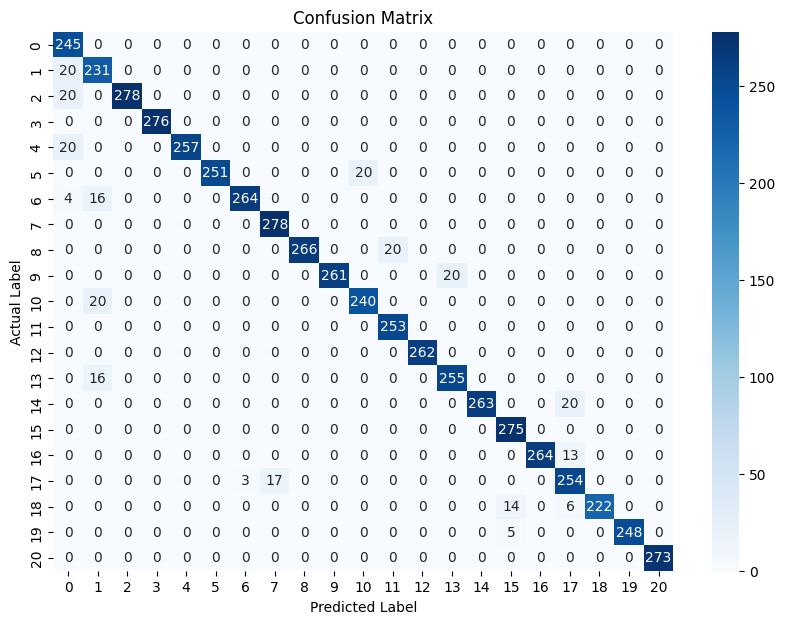

In [ ]:
cm = confusion_matrix(y_freq_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


### Fault Detection

In [ ]:
model= CatBoostClassifier(
        iterations=100,
        random_seed=42,
        learning_rate=.5,
        custom_loss=['Accuracy']
    )


model.fit(
        X_train,
        y_falut_train,
        verbose=False
    )

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_fault_test, y_pred)
print(f"Accuracy of falut detection ={accuracy}")

Accuracy of falut detection =0.980246913580247


In [ ]:
print(classification_report(y_fault_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2666
           1       0.97      0.99      0.98      3004

    accuracy                           0.98      5670
   macro avg       0.98      0.98      0.98      5670
weighted avg       0.98      0.98      0.98      5670



In [ ]:
precision_recall_fscore_support(y_fault_test, y_pred, average='weighted')

(0.9803548652728146, 0.980246913580247, 0.9802360103685506, None)

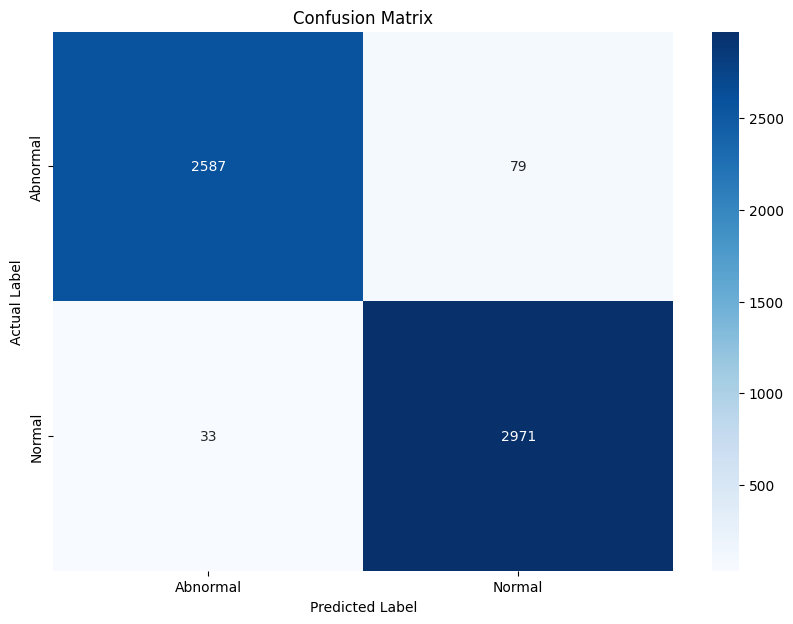

In [ ]:
cm = confusion_matrix(y_fault_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal','Normal'], yticklabels=['Abnormal','Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


## Random Forest

### Frequencey Identification

In [ ]:
model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)

model.fit( X_train, y_freq_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_freq_test, y_pred)
print(f"Accuracy of frequency ={accuracy}")

Accuracy of frequency =0.9541446208112875


In [ ]:
print(classification_report(y_freq_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       245
           1       0.86      1.00      0.93       251
           2       1.00      0.93      0.97       298
           3       0.93      1.00      0.97       276
           4       1.00      0.93      0.96       277
           5       1.00      0.93      0.96       271
           6       0.77      0.93      0.84       284
           7       0.94      1.00      0.97       278
           8       1.00      0.93      0.96       286
           9       1.00      0.93      0.96       281
          10       1.00      0.92      0.96       260
          11       0.93      1.00      0.96       253
          12       1.00      1.00      1.00       262
          13       0.93      0.93      0.93       271
          14       0.99      0.93      0.96       283
          15       0.93      0.93      0.93       275
          16       0.99      1.00      1.00       277
          17       0.87    

In [ ]:
precision_recall_fscore_support(y_freq_test, y_pred, average='weighted')

(0.9586567674046854, 0.9541446208112875, 0.9549800623042628, None)

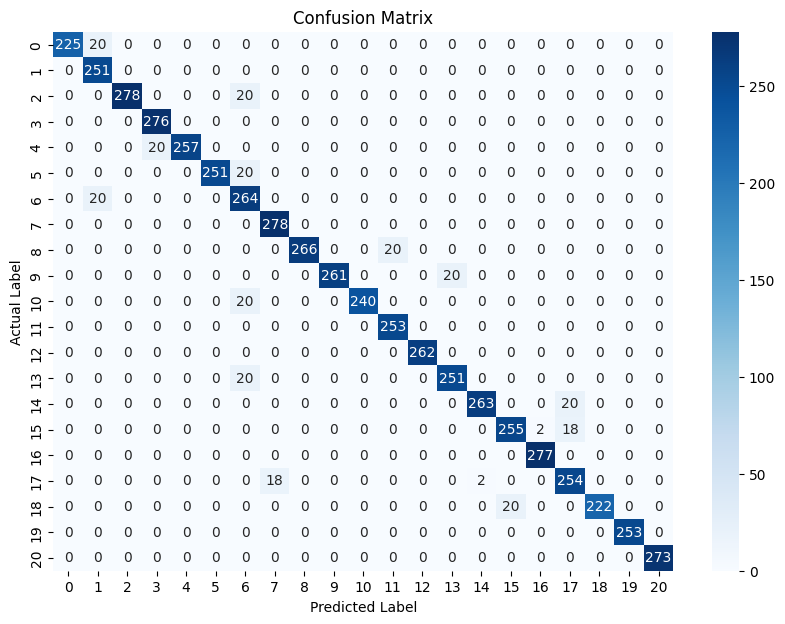

In [ ]:
cm = confusion_matrix(y_freq_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

### Fault Detection

In [ ]:
model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)

model.fit(
        X_train,
        y_falut_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_fault_test, y_pred)
print(f"Accuracy of falut detection ={accuracy}")

Accuracy of falut detection =0.9876543209876543


In [ ]:
print(classification_report(y_fault_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2666
           1       0.98      0.99      0.99      3004

    accuracy                           0.99      5670
   macro avg       0.99      0.99      0.99      5670
weighted avg       0.99      0.99      0.99      5670



In [ ]:
precision_recall_fscore_support(y_fault_test, y_pred, average='weighted')

(0.9877013719988417, 0.9876543209876543, 0.9876500635213206, None)

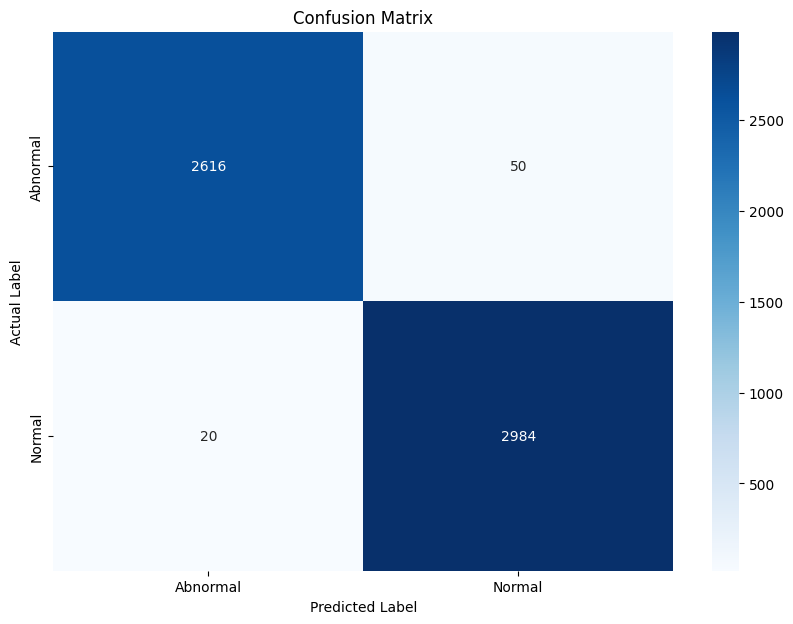

In [ ]:
cm = confusion_matrix(y_fault_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal','Normal'], yticklabels=['Abnormal','Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

##XGBoost

###Frequency Identification

In [ ]:
model = XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.1)

model.fit( X_train, y_freq_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_freq_test, y_pred)
print(f"Accuracy of frequency ={accuracy}")

Accuracy of frequency =0.944973544973545


In [ ]:
print(classification_report(y_freq_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       245
           1       0.87      0.92      0.90       251
           2       1.00      0.93      0.96       298
           3       0.77      1.00      0.87       276
           4       1.00      0.93      0.96       277
           5       0.98      0.93      0.95       271
           6       0.83      0.93      0.88       284
           7       1.00      0.93      0.96       278
           8       0.86      1.00      0.92       286
           9       0.93      0.93      0.93       281
          10       1.00      0.92      0.96       260
          11       1.00      0.95      0.98       253
          12       0.98      0.92      0.95       262
          13       0.93      1.00      0.96       271
          14       1.00      0.93      0.96       283
          15       0.93      0.93      0.93       275
          16       0.93      1.00      0.97       277
          17       1.00    

In [ ]:
precision_recall_fscore_support(y_freq_test, y_pred, average='weighted')

(0.9511622101827849, 0.944973544973545, 0.9460945626256164, None)

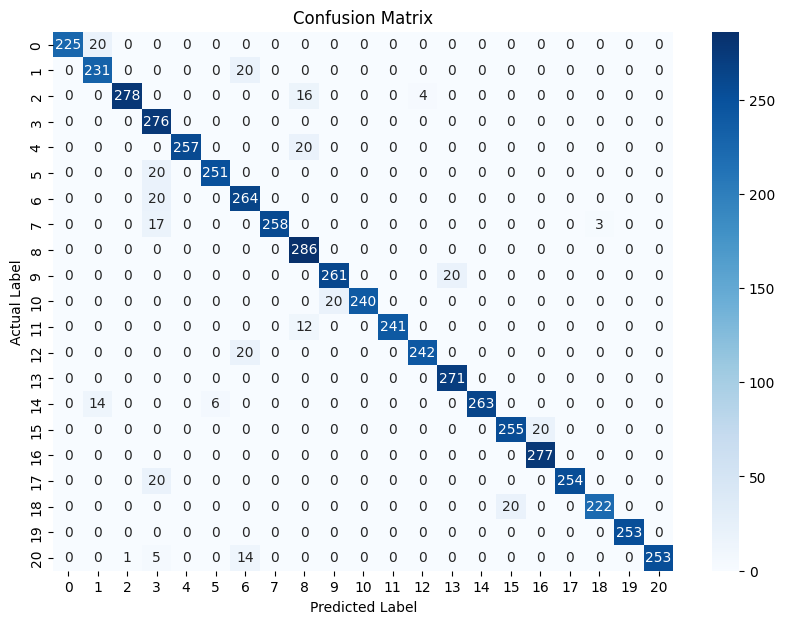

In [ ]:
cm = confusion_matrix(y_freq_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

###Fault Detection

In [ ]:
model = XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.1)
model.fit(
        X_train,
        y_falut_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_fault_test, y_pred)
print(f"Accuracy of fault detection ={accuracy}")

Accuracy of fault detection =0.982363315696649


In [ ]:
print(classification_report(y_fault_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2666
           1       0.98      0.99      0.98      3004

    accuracy                           0.98      5670
   macro avg       0.98      0.98      0.98      5670
weighted avg       0.98      0.98      0.98      5670



In [ ]:
precision_recall_fscore_support(y_fault_test, y_pred, average='weighted')

(0.9823799792305712, 0.982363315696649, 0.982359372044023, None)

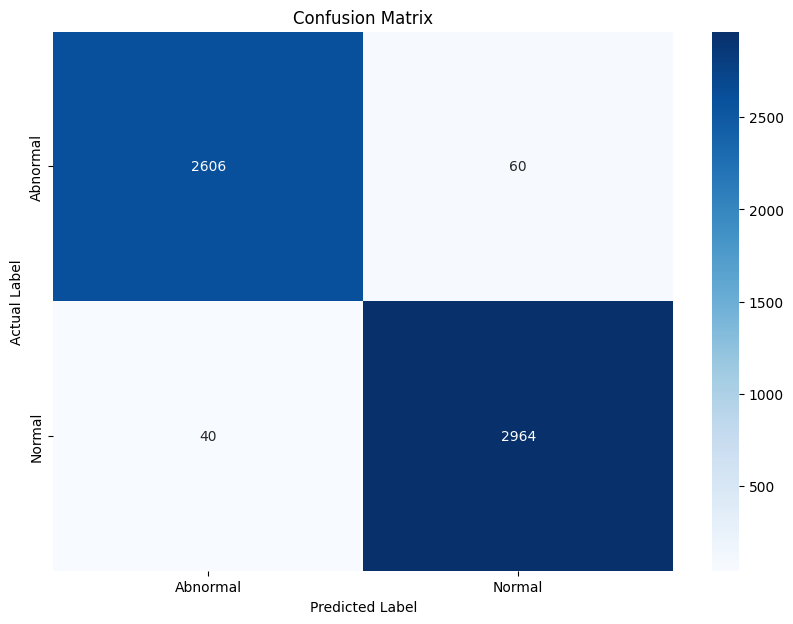

In [ ]:
cm = confusion_matrix(y_fault_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal','Normal'], yticklabels=['Abnormal','Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

##LGBM

###Frequency Identification

In [ ]:
model = lgb.LGBMClassifier(max_depth=5, n_estimators=100, learning_rate=0.1)
model.fit( X_train, y_freq_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_freq_test, y_pred)
print(f"Accuracy of frequency ={accuracy}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42840
[LightGBM] [Info] Number of data points in the train set: 15750, number of used features: 168
[LightGBM] [Info] Start training from score -3.011733
[LightGBM] [Info] Start training from score -3.019505
[LightGBM] [Info] Start training from score -3.082571
[LightGBM] [Info] Start training from score -3.052555
[LightGBM] [Info] Start training from score -3.053900
[LightGBM] [Info] Start training from score -3.045857
[LightGBM] [Info] Start training from score -3.063366
[LightGBM] [Info] Start training from score -3.055246
[LightGBM] [Info]

In [ ]:
print(classification_report(y_freq_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       245
           1       0.85      0.92      0.89       251
           2       0.99      0.93      0.96       298
           3       0.76      1.00      0.86       276
           4       1.00      0.93      0.96       277
           5       1.00      0.93      0.96       271
           6       0.91      0.93      0.92       284
           7       1.00      0.93      0.96       278
           8       0.86      1.00      0.93       286
           9       0.95      0.93      0.94       281
          10       0.95      0.92      0.94       260
          11       1.00      0.97      0.99       253
          12       0.99      1.00      1.00       262
          13       0.93      1.00      0.96       271
          14       1.00      0.93      0.96       283
          15       1.00      0.93      0.96       275
          16       0.93      0.96      0.95       277
          17       0.93    

In [ ]:
precision_recall_fscore_support(y_freq_test, y_pred, average='weighted')

(0.9532909027554904, 0.9476190476190476, 0.9486679794698069, None)

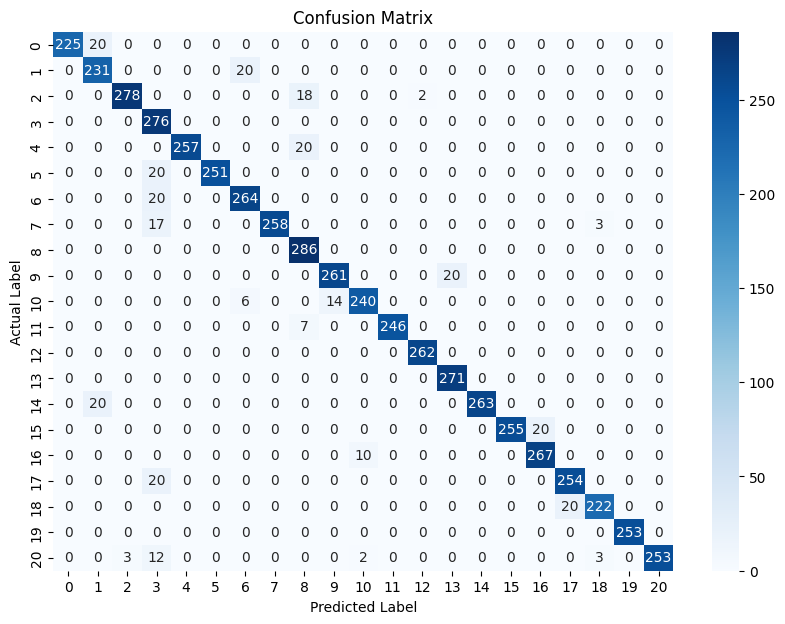

In [ ]:
cm = confusion_matrix(y_freq_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

###Fault Detection

In [ ]:
model = lgb.LGBMClassifier(max_depth=5, n_estimators=100, learning_rate=0.1)
model.fit(
        X_train,
        y_falut_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_fault_test, y_pred)
print(f"Accuracy of fault detection ={accuracy}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8216, number of negative: 7534
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42840
[LightGBM] [Info] Number of data points in the train set: 15750, number of used features: 168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.521651 -> initscore=0.086657
[LightGBM] [Info] Start training from score 0.086657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [ ]:
print(classification_report(y_fault_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2666
           1       0.98      0.99      0.98      3004

    accuracy                           0.98      5670
   macro avg       0.98      0.98      0.98      5670
weighted avg       0.98      0.98      0.98      5670



In [ ]:
precision_recall_fscore_support(y_fault_test, y_pred, average='weighted')

(0.9839916704950443, 0.9839506172839506, 0.9839452817290544, None)

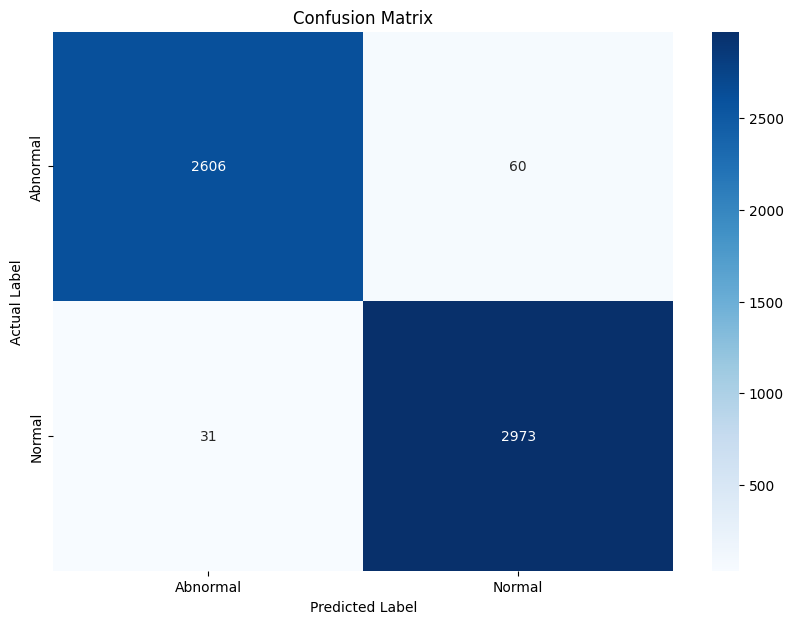

In [ ]:
cm = confusion_matrix(y_fault_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal','Normal'], yticklabels=['Abnormal','Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

##Decision Tree

###Frequency Identification

In [ ]:
model = DecisionTreeClassifier(max_depth=20, criterion='gini', min_samples_split=200)
model.fit( X_train, y_freq_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_freq_test, y_pred)
print(f"Accuracy of frequency ={accuracy}")

Accuracy of frequency =0.9428571428571428


In [ ]:
print(classification_report(y_freq_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       245
           1       1.00      0.94      0.97       251
           2       1.00      0.93      0.97       298
           3       1.00      1.00      1.00       276
           4       1.00      0.92      0.96       277
           5       1.00      0.93      0.96       271
           6       0.93      0.93      0.93       284
           7       0.76      0.93      0.83       278
           8       0.87      0.92      0.89       286
           9       1.00      0.93      0.96       281
          10       1.00      0.92      0.96       260
          11       0.86      1.00      0.93       253
          12       1.00      0.92      0.96       262
          13       0.79      0.93      0.85       271
          14       0.95      0.92      0.94       283
          15       1.00      0.93      0.96       275
          16       1.00      1.00      1.00       277
          17       0.86    

In [ ]:
precision_recall_fscore_support(y_freq_test, y_pred, average='weighted')

(0.9492594421900692, 0.9428571428571428, 0.9443297857021167, None)

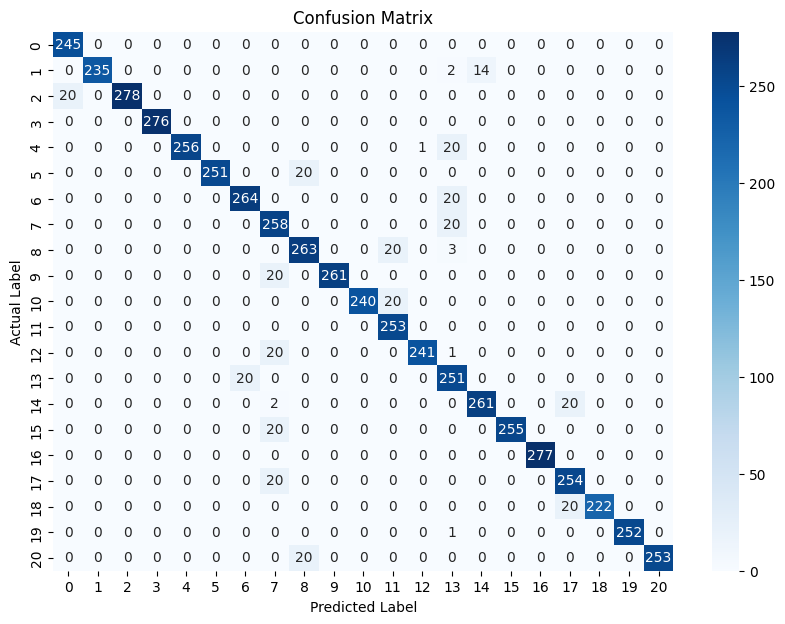

In [ ]:
cm = confusion_matrix(y_freq_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

###Fault Detection

In [ ]:
model = DecisionTreeClassifier(max_depth=20, criterion='gini', min_samples_split=200)
model.fit(
        X_train,
        y_falut_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_fault_test, y_pred)
print(f"Accuracy of fault detection ={accuracy}")

Accuracy of fault detection =0.9793650793650793


In [ ]:
print(classification_report(y_fault_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2666
           1       0.99      0.97      0.98      3004

    accuracy                           0.98      5670
   macro avg       0.98      0.98      0.98      5670
weighted avg       0.98      0.98      0.98      5670



In [ ]:
precision_recall_fscore_support(y_fault_test, y_pred, average='weighted')

(0.9797149929643054, 0.9793650793650793, 0.9793775232250482, None)

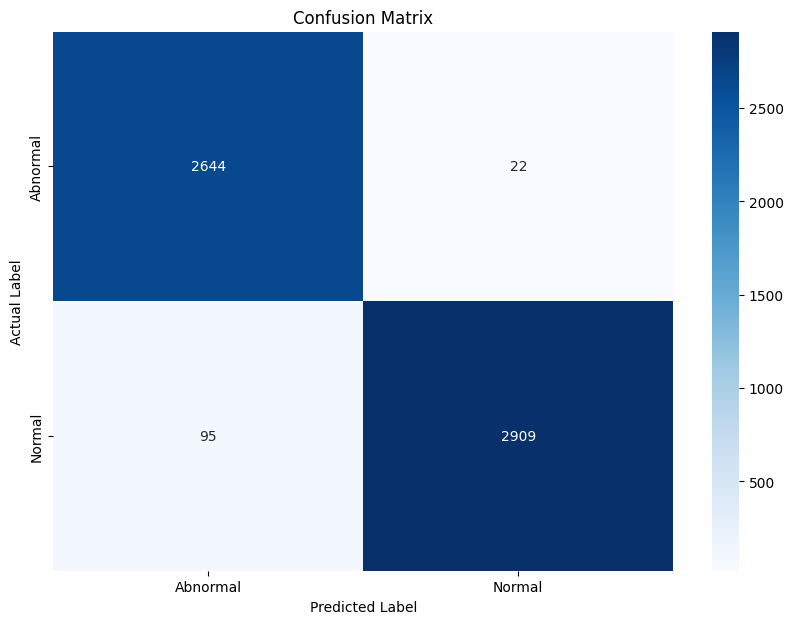

In [ ]:
cm = confusion_matrix(y_fault_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal','Normal'], yticklabels=['Abnormal','Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

##SVM

###Frequency Identification

In [ ]:
model = SVC(C=1.0, kernel='rbf', gamma='auto')
model.fit( X_train, y_freq_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_freq_test, y_pred)
print(f"Accuracy of frequency ={accuracy}")

Accuracy of frequency =0.9391534391534392


In [ ]:
print(classification_report(y_freq_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       245
           1       1.00      0.92      0.96       251
           2       1.00      0.93      0.97       298
           3       1.00      0.93      0.96       276
           4       1.00      0.93      0.96       277
           5       1.00      0.93      0.96       271
           6       1.00      0.93      0.96       284
           7       1.00      0.93      0.96       278
           8       1.00      0.93      0.96       286
           9       0.45      1.00      0.62       281
          10       1.00      0.92      0.96       260
          11       1.00      0.98      0.99       253
          12       1.00      0.92      0.96       262
          13       1.00      0.93      0.96       271
          14       1.00      0.93      0.96       283
          15       1.00      0.93      0.96       275
          16       1.00      0.93      0.96       277
          17       1.00    

In [ ]:
precision_recall_fscore_support(y_freq_test, y_pred, average='weighted')

(0.9726870869043394, 0.9391534391534392, 0.9495710820358666, None)

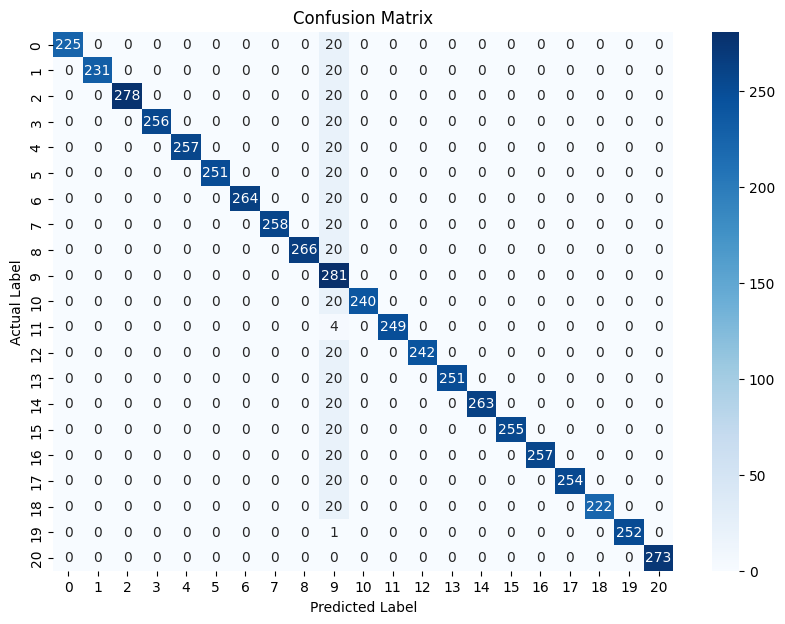

In [ ]:
cm = confusion_matrix(y_freq_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

###Fault Detection

In [ ]:
model = SVC(C=1.0, kernel='rbf', gamma='auto')
model.fit(
        X_train,
        y_falut_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_fault_test, y_pred)
print(f"Accuracy of fault detection ={accuracy}")

Accuracy of fault detection =0.9717813051146384


In [ ]:
print(classification_report(y_fault_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2666
           1       0.95      1.00      0.97      3004

    accuracy                           0.97      5670
   macro avg       0.97      0.97      0.97      5670
weighted avg       0.97      0.97      0.97      5670



In [ ]:
precision_recall_fscore_support(y_fault_test, y_pred, average='weighted')

(0.9732082934779943, 0.9717813051146384, 0.9717108222790319, None)

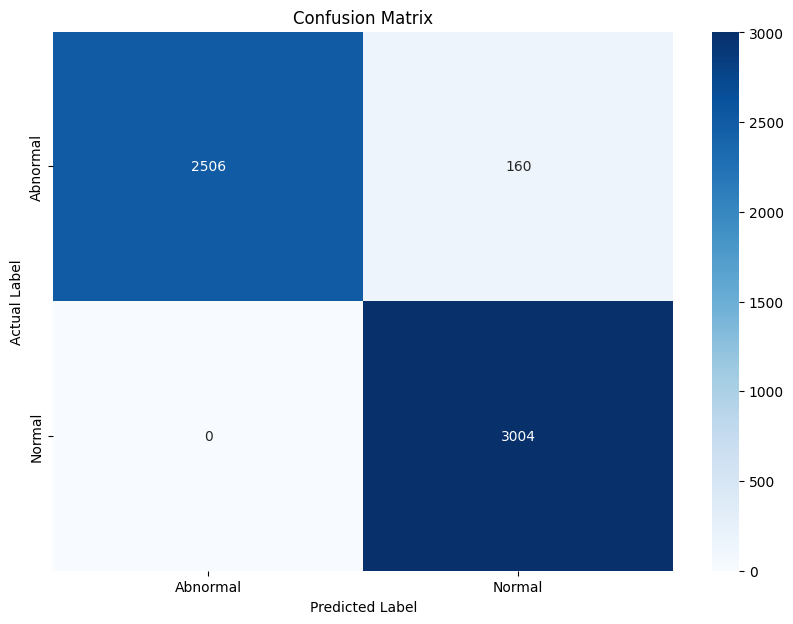

In [ ]:
cm = confusion_matrix(y_fault_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal','Normal'], yticklabels=['Abnormal','Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()